Primeras filas del DataFrame:
                        0                    1                2
0                Column1              Column2          Column3
1  AWS y Microsoft Azure                  NaN              NaN
2                    NaN                  NaN              NaN
3                 Semana  Amazon Web Services  Microsoft Azure
4             2019-12-01                   <1               46
Columnas detectadas: Index(['Semana', 'Amazon Web Services', 'Microsoft Azure'], dtype='object')
Primeras filas procesadas del DataFrame:
        Semana Amazon Web Services Microsoft Azure
0  2019-12-01                  <1              46
1  2019-12-08                  <1              47
2  2019-12-15                  <1              47
3  2019-12-22                  <1              25
4  2019-12-29                  <1              26


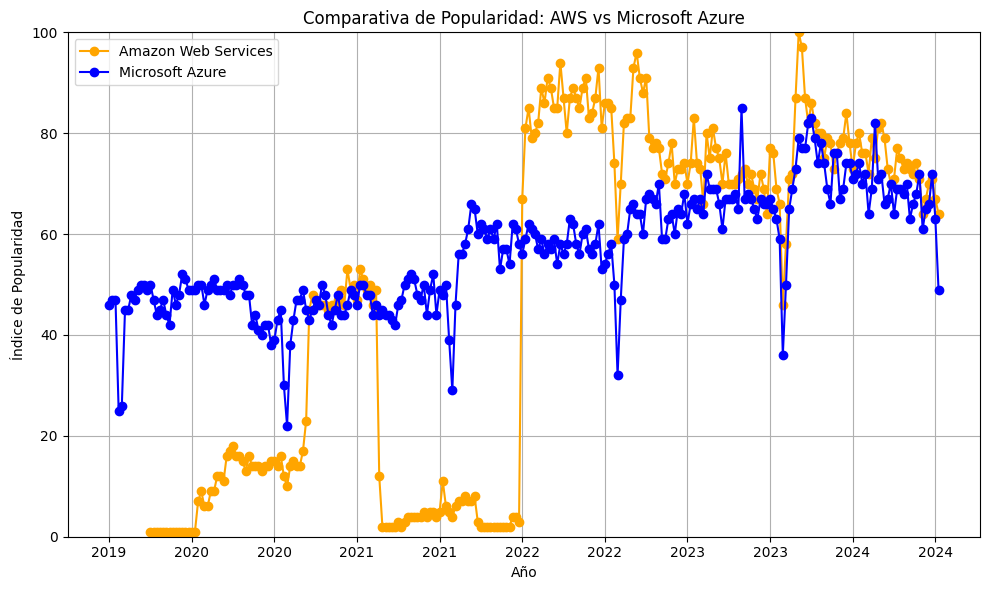

In [2]:
# Importar librerías necesarias para el análisis y visualización de datos
import matplotlib.pyplot as plt  # Para generar gráficos
import pandas as pd  # Para manipular y analizar datos en formato tabular

# Ruta del archivo
file_path = "D:/Documents/complementario-3125033/06-Sesión/Cloud Computing AWS vs Microsoft Azure/AWSyMicrosoftAzure.xlsx"

# Leer el archivo de Excel completo
# La opción `header=None` indica que no asumimos encabezados, se cargarán todos los datos tal como están.
data = pd.read_excel(file_path, header=None)
print("Primeras filas del DataFrame:\n", data.head())  # Mostrar las primeras filas para verificar los datos cargados

# Localizar los encabezados reales
headers_row = data[data.iloc[:, 0] == "Semana"].index[0]  # Encuentra la fila donde empieza "Semana"
data.columns = data.iloc[headers_row]  # Usa esa fila como nombres de columna
data = data[headers_row + 1:].reset_index(drop=True)  # Filtra los datos por debajo de los encabezados
data.columns.name = None  # Limpia el nombre del índice de columnas

# Verificar los nombres finales de las columnas
print("Columnas detectadas:", data.columns)
print("Primeras filas procesadas del DataFrame:\n", data.head())

# Extraer columnas relevantes
semanas = pd.to_datetime(data['Semana'], errors='coerce')  # Convertir la columna 'Semana' a datetime
aws = pd.to_numeric(data['Amazon Web Services'], errors='coerce')  # Aseguramos conversión numérica
azure = pd.to_numeric(data['Microsoft Azure'], errors='coerce')

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(semanas, aws, label='Amazon Web Services', color='orange', marker='o')
plt.plot(semanas, azure, label='Microsoft Azure', color='blue', marker='o')

# Personalización del gráfico
plt.ylim(0, 100)
plt.xticks(semanas[::len(semanas)//10], [str(year) for year in semanas.dt.year[::len(semanas)//10]])  # Ajustar las etiquetas de años
plt.xlabel('Año')
plt.ylabel('Índice de Popularidad')
plt.title('Comparativa de Popularidad: AWS vs Microsoft Azure')
plt.legend()
plt.grid()

# Mover la leyenda al lado izquierdo
plt.legend(loc='upper left')  # Aquí se especifica la ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()